In [1]:
# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [5]:
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Checking number of mice
mice_no=mouse_study['Mouse ID'].value_counts()
mice_no

g989    13
y865    10
v991    10
l733    10
a699    10
        ..
f932     1
b447     1
d133     1
n482     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
mice_number=mouse_study['Mouse ID'].nunique()
mice_number

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mouse_id=mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates_mouse_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=mouse_study.loc[mouse_study['Mouse ID']=='g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df=mouse_study.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
df_mice_number=new_df['Mouse ID'].nunique()
df_mice_number

248

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Summary_stat=new_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
Summary_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_data=new_df.groupby('Drug Regimen')['Mouse ID'].nunique()
bar_data

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

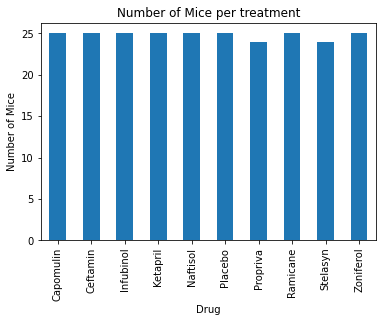

<Figure size 432x288 with 0 Axes>

In [14]:
drug_chart = bar_data.plot(kind="bar", title="Number of Mice per treatment")
drug_chart.set_xlabel("Drug")
drug_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

In [15]:
#Get length of x axis and
x_axis = np.arange(0, len(bar_data))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

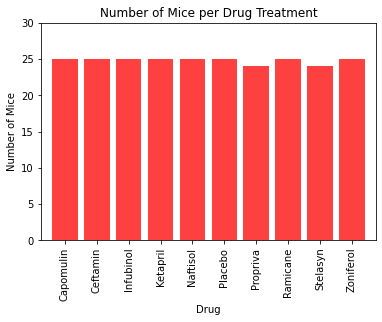

<Figure size 432x288 with 0 Axes>

In [16]:
    
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot

plt.title("Number of Mice per Drug Treatment")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(bar_data)-.25)
plt.ylim(0, max(bar_data) + 5)

plt.bar(x_axis, bar_data, facecolor="red", alpha=0.75, align="center")

plt.xticks(tick_locations, bar_data.index ,rotation="vertical" )
plt.show()
plt.tight_layout()

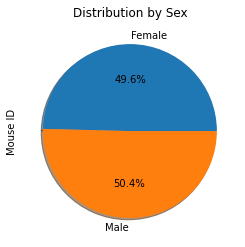

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distribution=new_df.groupby('Sex')['Mouse ID'].nunique()
pie_chart = gender_distribution.plot(kind="pie", autopct="%1.1f%%", shadow=True, title="Distribution by Sex")
pie_chart

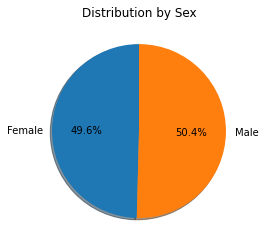

In [18]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution by Sex")
plt.pie(gender_distribution, labels=gender_distribution.index,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

In [19]:
#Getting the values for rows at which Timepoint is Maximum and displaying the dataset
idx=new_df.groupby(['Mouse ID'])['Timepoint'].transform(max)==new_df['Timepoint']
max_timepoints=new_df[idx]
max_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:

# Create a list of the four drugs
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
four_drugs = new_df[new_df['Drug Regimen'].isin(four_drug_list)]

# View 
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Then groupby 'Mouse ID' 
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [22]:
# Reshape dataframe by unstacking
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the head
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [23]:


#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


In [24]:

# Create an empty list
boxplot_list = []


for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

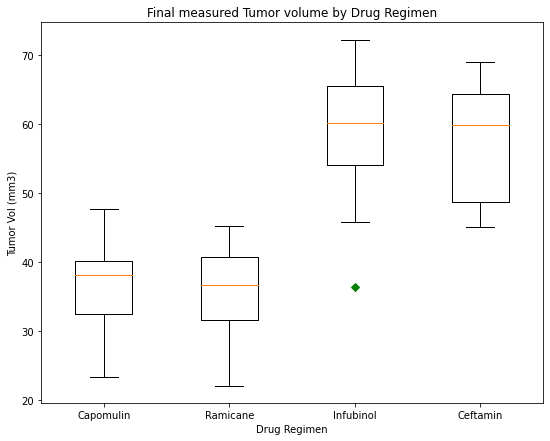

In [25]:
#Plotting
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)


plt.show()

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
Capomulin=new_df.loc[new_df['Drug Regimen'] == 'Capomulin']
Capomulin_one=Capomulin.loc[Capomulin['Mouse ID']=='s185']
Capomulin_one


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


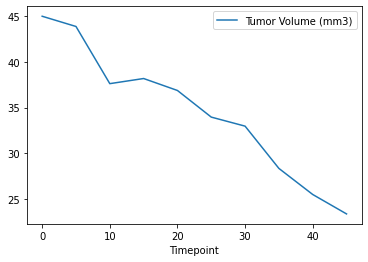

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_one.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
plt.show()

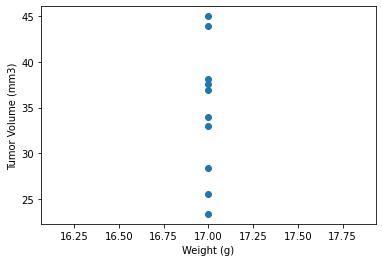

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(Capomulin_one.iloc[:,4],Capomulin_one.iloc[:,6])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [30]:
Capomulin=new_df.loc[new_df['Drug Regimen'] == 'Capomulin']
#Capomulin_two=Capomulin.loc[Capomulin['Mouse ID']=='l509']
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [31]:
capo_avg = Capomulin.groupby(['Mouse ID']).mean()
wgt = capo_avg['Weight (g)']
tmr = capo_avg['Tumor Volume (mm3)']
tmr

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [32]:
#wgt = Capomulin_two.iloc[:,4]
#tmr = Capomulin_two.iloc[:,6]
correlation = sts.pearsonr(wgt,tmr)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


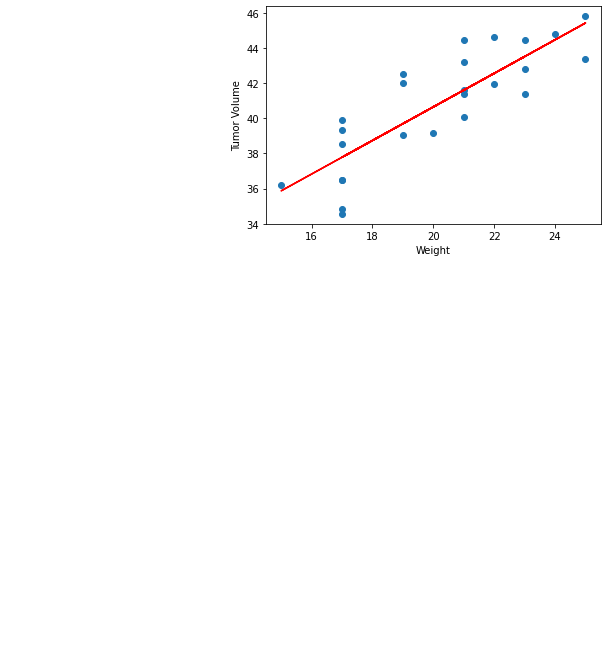

In [33]:
# Add the linear regression equation and line to plot
x_values = wgt # Capomulin_one['Weight (g)']
y_values = tmr # Capomulin_one['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()